In [4]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading dataset from CSV file using pandas
boston = pd.read_csv("Boston.csv")
print(boston)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv 

In [15]:
# exploring dataset
print("printing first 5 rows", boston.head())
print("printing last 5 rows", boston.tail())
print("printing info", boston.info())
print("Statistical analysis:", boston.describe().T)
print("Calculating coorelation",boston.corr())


printing first 5 rows    Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
printing last 5 rows      Unnamed: 0     crim   zn  indus  chas    nox     rm   age     dis  rad  \
501         502  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  

In [ ]:
# Selecting feature columns & target columns
feature_cols = boston[["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio"]]
x = feature_cols
y = boston["medv"]


In [ ]:
# exploring data through visualizing
for cols in x:
    sns.regplot(x=cols, y=y, data=boston).set(title=f'Regression plot of {x} and {y}');
    plt.show()

for cols in x:
    sns.histplot(x=cols, y=y, data=boston, kde= True).set(title=f'Hist plot of {x} and {y}');
    plt.show()



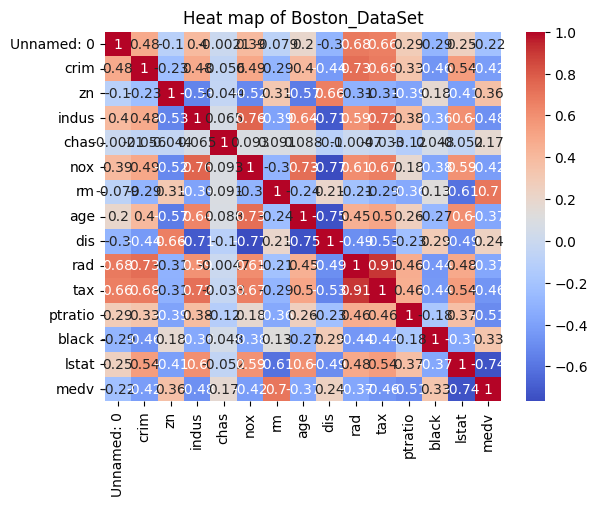

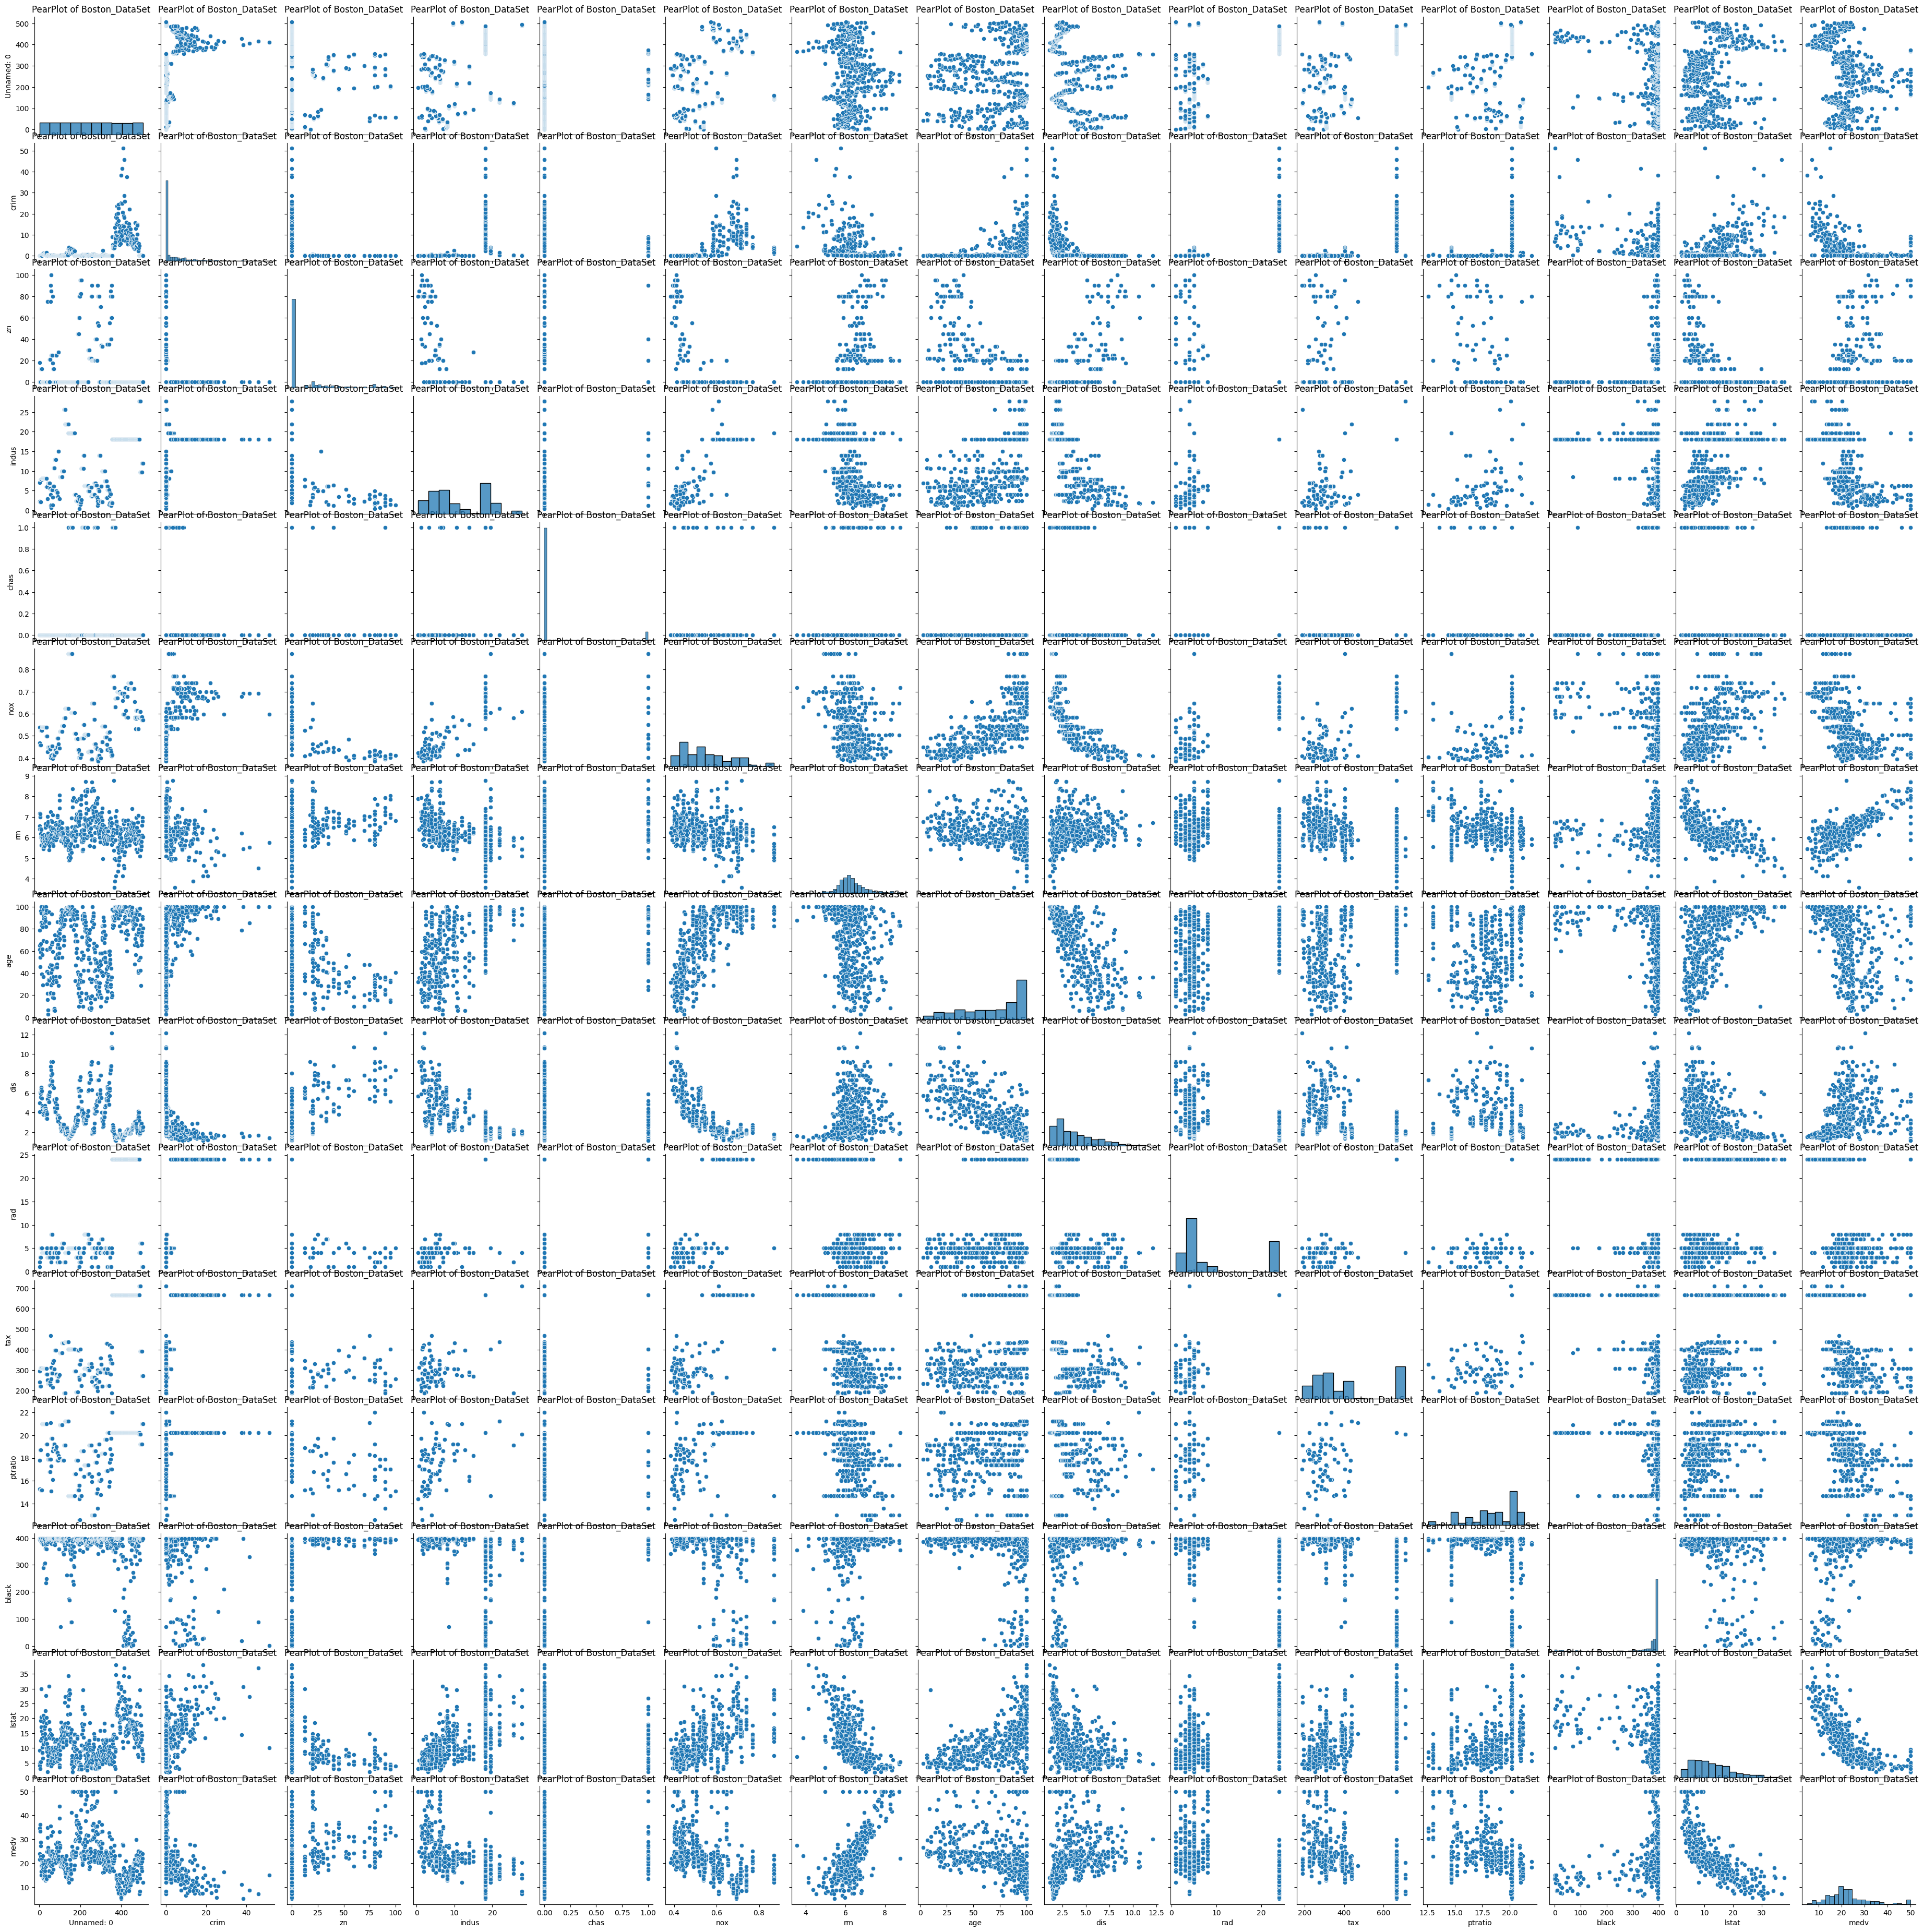

In [20]:
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm').set(title='Heat map of Boston_DataSet')
# Display the plot
plt.show()

sns.pairplot(boston).set(title='PearPlot of Boston_DataSet')
plt.show()



In [33]:
# Data cleaning 
# Removing outliners in column 'crim'
boston.loc[boston["crim"] >= 35]
boston["crim"] = boston["crim"] < 35



In [34]:
boston.loc[boston["crim"] >= 35]

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


In [19]:
boston.loc[boston["crim"] >= 60]
boston.corr()['medv'].sort_values(ascending=False)

medv          1.000000
rm            0.699909
zn            0.358846
black         0.331893
dis           0.242542
chas          0.174062
Unnamed: 0   -0.219332
age          -0.371208
rad          -0.371903
crim         -0.416628
nox          -0.421662
tax          -0.460871
indus        -0.479294
ptratio      -0.505025
lstat        -0.735494
Name: medv, dtype: float64

In [ ]:
# Selecting feature columns & target columns
feature_cols1 = boston[["crim", "zn", "indus", "nox", "rm", "age", "tax", "ptratio", "lstat", "dis", "rad"]]

x1 = feature_cols1
y1 = boston["medv"]


d:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
# importing libraries to train model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1,
                                                                  y1,
                                                             train_size=.7,
                                                           random_state=25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform features
X_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred_reg = regressor.predict(X_test_scaled)

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
r_score = r2_score(y_test, y_pred_reg)
rmse = root_mean_squared_error(y_test, y_pred_reg)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'R2_Score: {r_score}')
print(f'Root Mean Square error: {rmse:.2f}')

print()
print()

mae_r = mean_absolute_error(y_test, y_pred_ridge)
mse_r = mean_squared_error(y_test, y_pred_ridge)
r_score_r = r2_score(y_test, y_pred_ridge)
rmse_r = root_mean_squared_error(y_test, y_pred_ridge)

print(f'Mean absolute error of Ridge Model: {mae_r:.2f}')
print(f'Mean squared error of Ridge Model: {mse_r:.2f}')
print(f'R2_Score of Ridge Model: {r_score_r}')
print(f'Root Mean Square error of Ridge Model: {rmse_r:.2f}')





Mean absolute error: 3.50
Mean squared error: 22.94
R2_Score: 0.7324672983054885
Root Mean Square error: 4.79


Mean absolute error of Ridge Model: 3.49
Mean squared error of Ridge Model: 22.93
R2_Score of Ridge Model: 0.7325396260301019
Root Mean Square error of Ridge Model: 4.79
